# **📚1-Installing Dependencies**

In [1]:
!pip install opencv-python

In [2]:
!pip install tensor flow

  Using cached tensor-0.3.6.tar.gz (50 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached flow-0.1.2.tar.gz (139 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [10 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\tarun\AppData\Local\Temp\pip-install-qld7gjix\flow_b9907c27141f481880dbe139da60264f\setup.py", line 35, in <module>
      long_description = f.read()
                         ^^^^^^^^
    File "C:\Users\tarun\anaconda3\Lib\encodings\cp1252.py", line 23, in decode
      return codecs.charmap_decode(input,self.errors,decoding_table)[0]
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 2601: character maps to <undefined>
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.



In [3]:
!pip install numpy

In [4]:
!pip install pandas

In [5]:
!pip install keras

In [6]:
!pip install adam

In [7]:
!pip install kwargs

ERROR: Could not find a version that satisfies the requirement kwargs (from versions: none)
ERROR: No matching distribution found for kwargs


In [8]:
!pip install cinit

# 2 - **📚Import library**


In [9]:
import sys, os
import pandas as pd
import numpy as np

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
#from keras.utils import np_utils

from keras.utils import to_categorical
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

In [11]:
df=pd.read_csv('./fer2013.csv')

#**📚2-Data Description**

In [12]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB
None


In [14]:
print(df["Usage"].value_counts())

Usage
Training       28709
PublicTest      3589
PrivateTest     3589
Name: count, dtype: int64


In [15]:
print(df.head())

   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training


In [16]:
df.shape

(35887, 3)

# **Data Spliting**

In [17]:
X_train,train_y,X_test,test_y=[],[],[],[]

for index, row in df.iterrows():
    val=row['pixels'].split(" ")
    try:
        if 'Training' in row['Usage']:
           X_train.append(np.array(val,'float32'))
           train_y.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
           X_test.append(np.array(val,'float32'))
           test_y.append(row['emotion'])
    except:
        print(f"error occured at index :{index} and row:{row}")

In [18]:
num_features = 64
num_labels = 7
batch_size = 64
epochs = 30
width, height = 48, 48

In [19]:
X_train = np.array(X_train,'float32')
train_y = np.array(train_y,'float32')
X_test = np.array(X_test,'float32')
test_y = np.array(test_y,'float32')

In [20]:
#train_y=np_utils.to_categorical(train_y, num_classes=num_labels)
#test_y=np_utils.to_categorical(test_y, num_classes=num_labels)

In [21]:
train_y=to_categorical(train_y, num_classes=num_labels)
test_y=to_categorical(test_y, num_classes=num_labels)

#📚4- **Normalizing data between 0 and 1**

In [22]:
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)
X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

# 📚5- **Designing the CNN**


##5.1- **1st convolution layer**

In [23]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))
model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

C:\Users\tarun\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 5.2 - **2nd Convolution Layer**

In [24]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

## 5.3- **3rd Convolution Layer**

In [25]:
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Flatten())

# 5.4-  **Fully connected neural network**

In [26]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_labels, activation='softmax'))
# model.summary()

#**📚6-Training**

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import keras
import keras.utils
from keras import utils as np_utils

In [28]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam


In [29]:
gen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2]
)


In [30]:
train_generator = gen.flow(X_train, train_y, batch_size=batch_size)


In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(train_y.shape[1], activation='softmax')
])


In [32]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)


In [33]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)


In [34]:
model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // batch_size,
    epochs=epochs,
    validation_data=(X_test, test_y),  # Assuming you have validation data
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/30


C:\Users\tarun\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 515s 1s/step - accuracy: 0.2001 - loss: 2.2292 - val_accuracy: 0.2552 - val_loss: 1.8272 - learning_rate: 0.0010
Epoch 2/30
  1/448 ━━━━━━━━━━━━━━━━━━━━ 5:22 720ms/step - accuracy: 0.2500 - loss: 1.8701

C:\Users\tarun\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.2500 - loss: 1.8701 - val_accuracy: 0.2552 - val_loss: 1.8258 - learning_rate: 0.0010
Epoch 3/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 549s 1s/step - accuracy: 0.2443 - loss: 1.8687 - val_accuracy: 0.2761 - val_loss: 1.7386 - learning_rate: 0.0010
Epoch 4/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.2656 - loss: 1.8014 - val_accuracy: 0.2758 - val_loss: 1.7386 - learning_rate: 0.0010
Epoch 5/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 174s 387ms/step - accuracy: 0.2730 - loss: 1.7931 - val_accuracy: 0.3227 - val_loss: 1.6553 - learning_rate: 0.0010
Epoch 6/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.3438 - loss: 1.5942 - val_accuracy: 0.3249 - val_loss: 1.6604 - learning_rate: 0.0010
Epoch 7/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 331s 738ms/step - accuracy: 0.2899 - loss: 1.7424 - val_accuracy: 0.3307 - val_loss: 1.6931 - learning_rate: 0.0010
Epoch 8/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.3438 - loss: 1.7041

##6.2-**Method 2 Compliling the model**

In [35]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

In [36]:
model.fit(X_train, train_y,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, test_y),
          shuffle=True)

Epoch 1/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 205s 449ms/step - accuracy: 0.5081 - loss: 1.2841 - val_accuracy: 0.5202 - val_loss: 1.2453
Epoch 2/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 197s 439ms/step - accuracy: 0.5691 - loss: 1.1411 - val_accuracy: 0.5712 - val_loss: 1.1163
Epoch 3/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 214s 477ms/step - accuracy: 0.6036 - loss: 1.0509 - val_accuracy: 0.5770 - val_loss: 1.1761
Epoch 4/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 220s 490ms/step - accuracy: 0.6339 - loss: 0.9790 - val_accuracy: 0.5913 - val_loss: 1.0861
Epoch 5/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 365s 815ms/step - accuracy: 0.6705 - loss: 0.8912 - val_accuracy: 0.6049 - val_loss: 1.0733
Epoch 6/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 545s 1s/step - accuracy: 0.6911 - loss: 0.8283 - val_accuracy: 0.6013 - val_loss: 1.1056
Epoch 7/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 689s 1s/step - accuracy: 0.7197 - loss: 0.7596 - val_accuracy: 0.6160 - val_loss: 1.1056
Epoch 8/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 582s 1s/step - accuracy: 0.7423 - loss: 0.

#📚7-**Saving the  model**

In [37]:
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("fer.weights.h5")

#📚8-**Evaluate model [2]**

In [38]:
train_score = model.evaluate(X_train, train_y, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
test_score = model.evaluate(X_test, test_y, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 0.026623014360666275
Train accuracy: 99.55414533615112
Test loss: 1.7197351455688477
Test accuracy: 61.77208423614502


# **📚9-Confusion Matrix**[2]

113/113 ━━━━━━━━━━━━━━━━━━━━ 27s 224ms/step


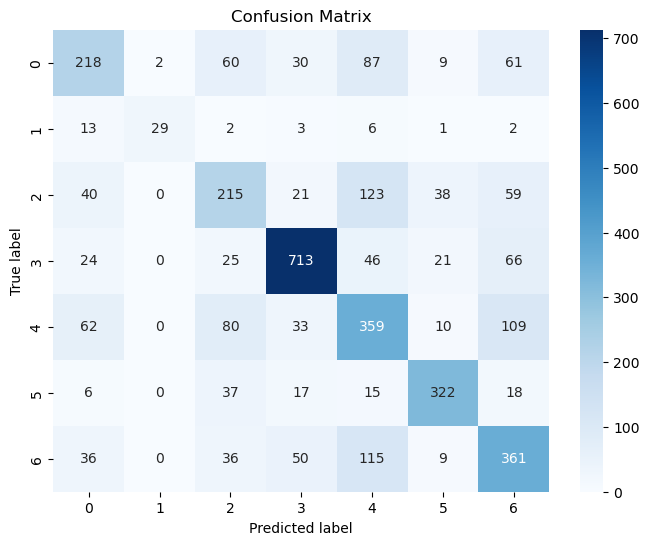

In [39]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have trained your model and obtained predictions on test data
# Replace these with your actual predictions and true labels
y_pred = np.argmax(model.predict(X_test), axis=1)

y_true = np.argmax(test_y, axis=1)  # Convert one-hot encoded true labels back to categorical

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

#**📚10-Testing**[2]

Emotions stored as numerical as labeled from 0 to 6. Keras would produce an output array including these 7 different emotion scores. We can visualize each prediction as bar chart.

In [40]:
def emotion_analysis(emotions):
  objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
  y_pos = np.arange(len(objects))
  plt.bar(y_pos, emotions, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('percentage')
  plt.title('emotion')
  plt.show()

#**📚11-Detecting Real-Time Emotion**

In [1]:
import cv2
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image
from collections import deque

# Load model
model = model_from_json(open("fer.json", "r").read())
model.load_weights('fer.weights.h5')
face_haar_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(0)

# Create a deque to store a history of predictions
predictions_history = deque(maxlen=10)  # Adjust the maxlen for more smoothing

while True:
    ret, test_img = cap.read()  # captures frame and returns boolean value and captured image
    if not ret:
        print("Error: Unable to capture frame from the webcam.")
        break

    gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

    # Apply histogram equalization to improve contrast
    gray_img = cv2.equalizeHist(gray_img)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)

    for (x, y, w, h) in faces_detected:
        # Draw a thicker bounding box with green color
        cv2.rectangle(test_img, (x, y), (x + w, y + h), (0, 255, 0), thickness=2)
        roi_gray = gray_img[y:y + w, x:x + h]  # cropping region of interest i.e. face area from image
        roi_gray = cv2.resize(roi_gray, (48, 48))

        # Preprocess the face region
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis=0)
        img_pixels /= 255.0  # Ensure normalization matches training

        predictions = model.predict(img_pixels)

        # Add predictions to history
        predictions_history.append(predictions[0])

        # Average the predictions in the history
        avg_predictions = np.mean(predictions_history, axis=0)

        # Find max indexed array
        max_index = np.argmax(avg_predictions)

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]
        confidence = avg_predictions[max_index] * 100  # Convert confidence to percentage

        # Improve emotion label with a filled rectangle background
        label = f"{predicted_emotion} ({confidence:.2f}%)"
        label_size, base_line = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 1, 2)
        label_ymin = max(y, label_size[1] + 10)
        
        # Draw filled rectangle with blue color for label background
        cv2.rectangle(test_img, (x, label_ymin - label_size[1] - 10), (x + label_size[0] + 2, label_ymin + base_line - 10), (255, 0, 0), cv2.FILLED)
        
        # Put text with white color for label text
        cv2.putText(test_img, label, (x, label_ymin - 7), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial emotion analysis', resized_img)

    if cv2.waitKey(10) == ord('q'):  # wait until 'q' key is pressed
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━